# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [20]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [51]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

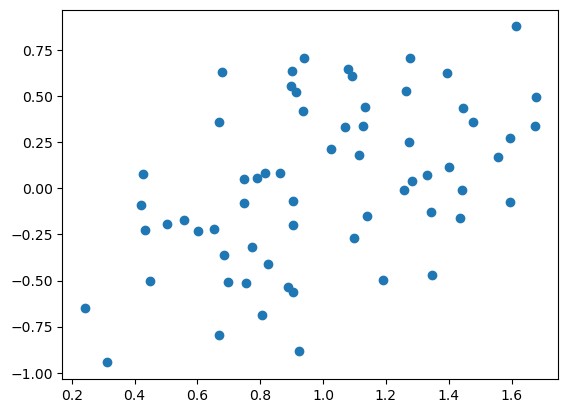

In [52]:
plt.scatter(x.T[0], y)

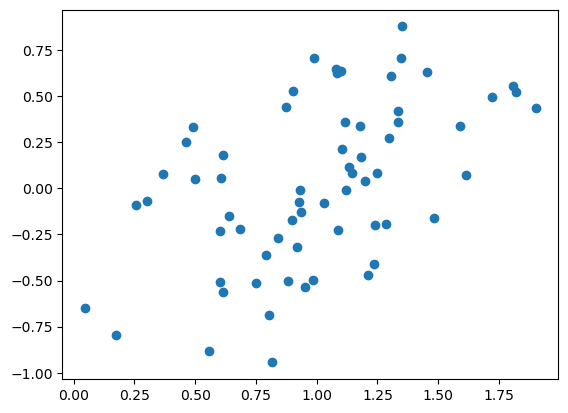

In [53]:
plt.scatter(x.T[1], y)

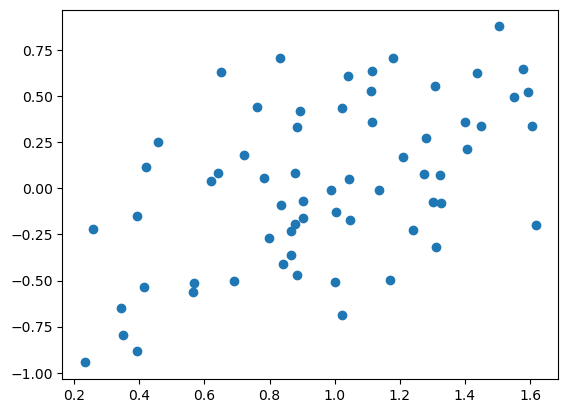

In [54]:
plt.scatter(x.T[2], y)

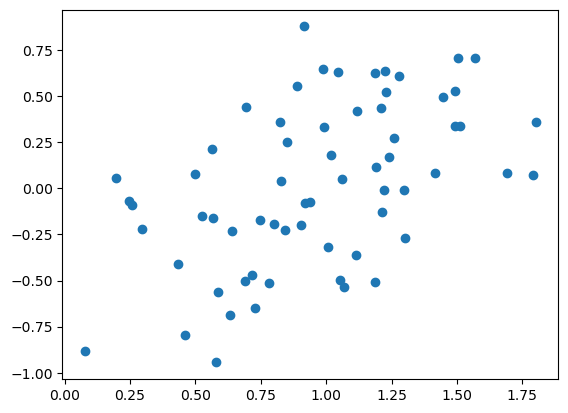

In [55]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [70]:
beta = np.linalg.lstsq(x, y)[0]
beta

C:\Users\jorda\AppData\Local\Temp\ipykernel_48204\4087615102.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(x, y)[0]


array([ 0.22729526,  0.18837653,  0.33780781,  0.23293845, -0.94804625])

In [57]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

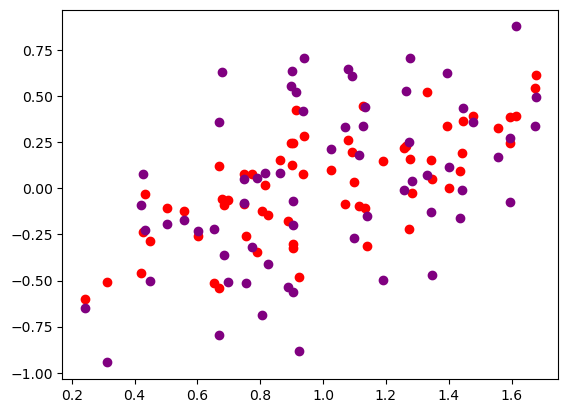

In [58]:
plt.scatter(x.T[0], pred, c = 'red')
plt.scatter(x.T[0], y, c = 'purple')

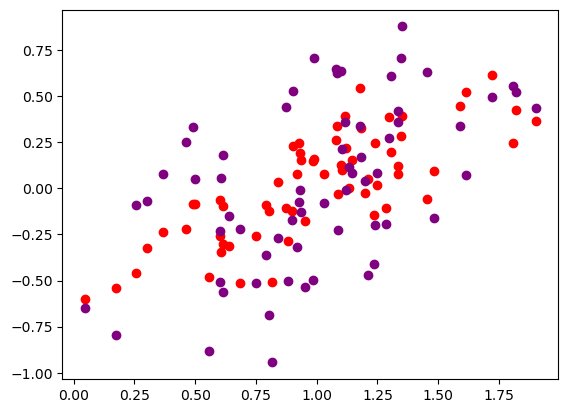

In [59]:
plt.scatter(x.T[1], pred, c = 'red')
plt.scatter(x.T[1], y, c = 'purple')

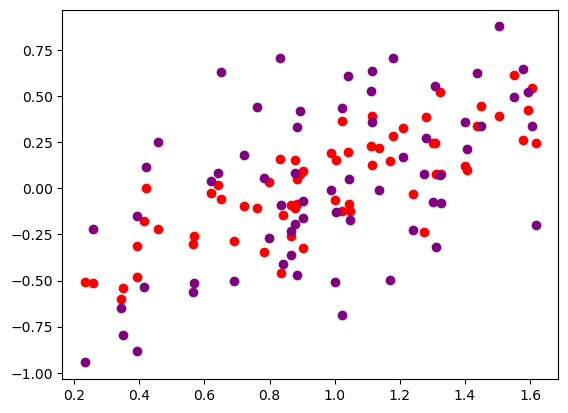

In [60]:
plt.scatter(x.T[2], pred, c = 'red')
plt.scatter(x.T[2], y, c = 'purple')

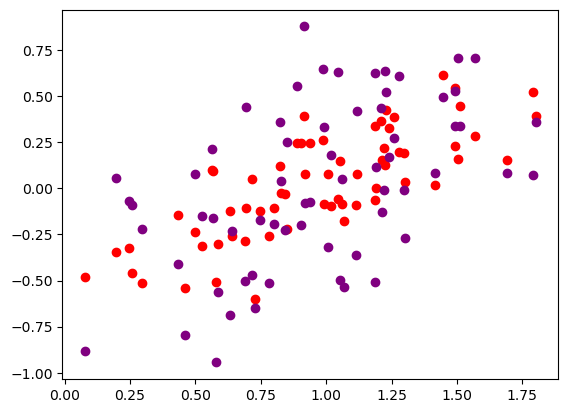

In [61]:
plt.scatter(x.T[3], pred, c = 'red')
plt.scatter(x.T[3], y, c = 'purple')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [62]:
import pandas as pd
import numpy as np
credit = pd.read_csv('Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [87]:
columns = ['Income', 'Limit', 'Cards', 'Age', 'Education', 'Balance']
x2 = credit[columns].values
x2 = np.vstack([x2.T, np.ones(len(x2))]).T
x2

array([[1.48910e+01, 3.60600e+03, 2.00000e+00, ..., 1.10000e+01,
        3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, ..., 1.50000e+01,
        9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, ..., 1.10000e+01,
        5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, ..., 1.20000e+01,
        1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, ..., 1.30000e+01,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, ..., 7.00000e+00,
        9.66000e+02, 1.00000e+00]])

In [88]:
y2 = credit['Rating']
y2

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [89]:
beta2 = np.linalg.lstsq(x2, y2)[0]
beta2

C:\Users\jorda\AppData\Local\Temp\ipykernel_48204\1242549579.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta2 = np.linalg.lstsq(x2, y2)[0]


array([ 9.48157743e-02,  6.42304413e-02,  4.67706085e+00,  8.06617460e-03,
       -2.30863025e-01,  8.18115721e-03,  3.10522106e+01])

In [90]:
pred2 = np.dot(x2, beta2)

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

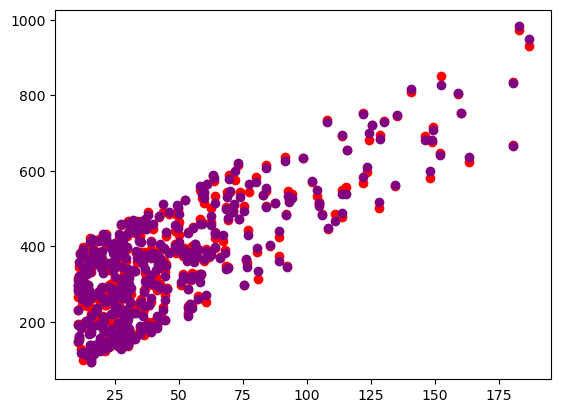

In [92]:
plt.scatter(x2.T[0], pred2, c = 'red')
plt.scatter(x2.T[0], y2, c = 'purple')

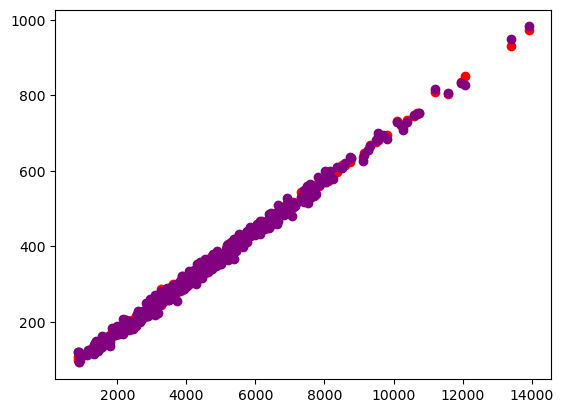

In [93]:
plt.scatter(x2.T[1], pred2, c = 'red')
plt.scatter(x2.T[1], y2, c = 'purple')

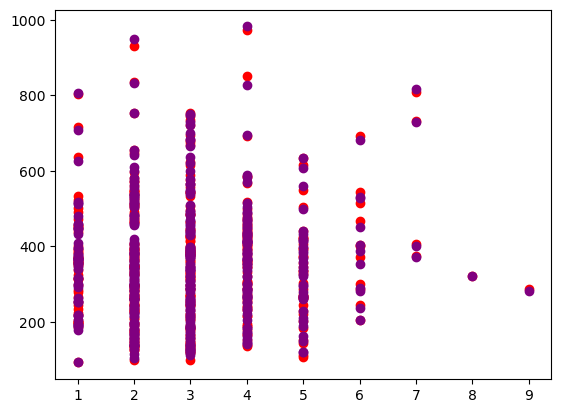

In [94]:
plt.scatter(x2.T[2], pred2, c = 'red')
plt.scatter(x2.T[2], y2, c = 'purple')

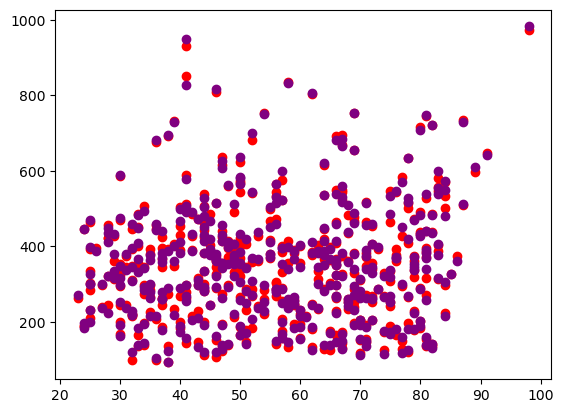

In [95]:
plt.scatter(x2.T[3], pred2, c = 'red')
plt.scatter(x2.T[3], y2, c = 'purple')

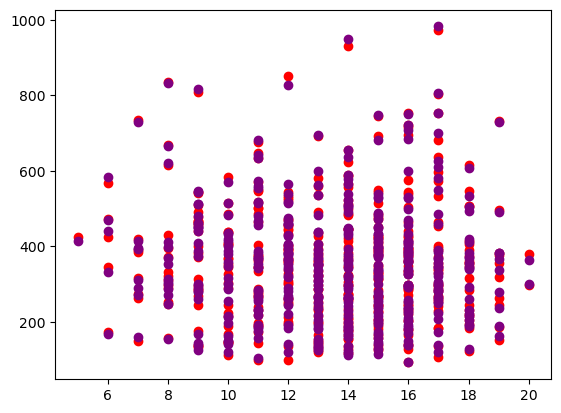

In [96]:
plt.scatter(x2.T[4], pred2, c = 'red')
plt.scatter(x2.T[4], y2, c = 'purple')

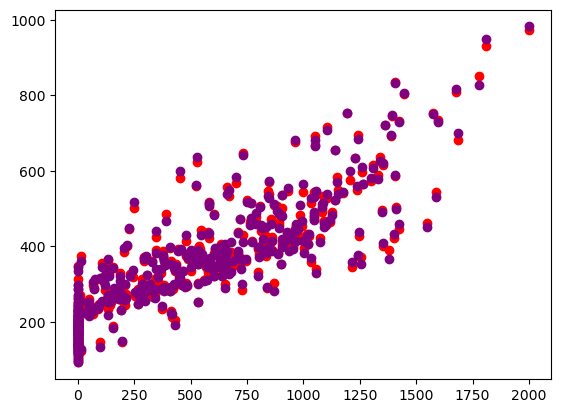

In [97]:
plt.scatter(x2.T[5], pred2, c = 'red')
plt.scatter(x2.T[5], y2, c = 'purple')